# ***Randevu Katılım Tahmini: Sağlıkta Veri Analitiği ve Makine Öğrenimi Uygulaması***







# ***VERİ SETİNİN SAYFAYA DAHİL EDİLMESİ***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro
import statsmodels.api as sm
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
import time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
dfC = pd.read_csv("healthcare_noshows.csv")

In [3]:
df = dfC.copy()

In [4]:
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0


In [5]:
df.tail(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
106984,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,False,False,False,False,False,True,True,41
106985,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,False,False,False,False,False,True,True,41
106986,3.775115e+14,5629448,F,2016-04-27,2016-06-07,54,MARIA ORTIZ,False,False,False,False,False,True,True,41


# ***KEŞİFSEL VERİ ANALİZİ ***

In [6]:
df.shape       #satir ve sutun sayısını gösterir

(106987, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106987 entries, 0 to 106986
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       106987 non-null  float64
 1   AppointmentID   106987 non-null  int64  
 2   Gender          106987 non-null  object 
 3   ScheduledDay    106987 non-null  object 
 4   AppointmentDay  106987 non-null  object 
 5   Age             106987 non-null  int64  
 6   Neighbourhood   106987 non-null  object 
 7   Scholarship     106987 non-null  bool   
 8   Hipertension    106987 non-null  bool   
 9   Diabetes        106987 non-null  bool   
 10  Alcoholism      106987 non-null  bool   
 11  Handcap         106987 non-null  bool   
 12  SMS_received    106987 non-null  bool   
 13  Showed_up       106987 non-null  bool   
 14  Date.diff       106987 non-null  int64  
dtypes: bool(7), float64(1), int64(3), object(4)
memory usage: 7.2+ MB


 Sütunlar arasında PatientId, AppointmentID, Age ve Date.diff gibi sayısal veri türlerinde (float64 ve int64) sütunlar bulunurken, Gender, ScheduledDay, AppointmentDay, Neighbourhood gibi kategorik veri türlerinde (object) sütunlar da mevcuttur. Ayrıca, Scholarship gibi Boolean (True/False) türünde bir sütun da bulunmaktadır. Veri setinde boş (null) değer bulunmamaktadır. Bu veri seti, toplamda 6.2 MB bellek kullanmaktadır ve büyük bir veri seti olmasına rağmen, tekrarlanan satır bulunmamaktadır.

In [8]:
df.axes

[RangeIndex(start=0, stop=106987, step=1),
 Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
        'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
        'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Showed_up',
        'Date.diff'],
       dtype='object')]

Bu çıktı, veri çerçevenizin yapısını göstermektedir. İlk liste, satır indekslerini belirtir ve burada RangeIndex(start=0, stop=57826, step=1) ifadesi, satır indekslerinin 0'dan başlayıp 57825'e kadar sıralandığını gösterir (toplamda 57826 satır). İkinci liste ise sütun adlarını içerir ve DataFrame'inizdeki sütunlar sırasıyla 'PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Showed_up', 'Date.diff' olarak belirtilmiştir. Bu, veri çerçevesinin toplamda 15 sütun içerdiğini ve her bir sütunun ismini gösterir.

In [9]:
df["Age"].min()

1

In [10]:
df["Age"].max()

115

In [11]:
df[df["Age"] == 115].index

Index([61803, 61806, 65876, 73825, 94560], dtype='int64')

In [12]:
df[df["Age"] == 115].head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
61803,3.196321e+13,5700278,F,2016-05-16,2016-05-19,115,ANDORINHAS,False,False,False,False,True,False,False,3
61806,3.196321e+13,5700279,F,2016-05-16,2016-05-19,115,ANDORINHAS,False,False,False,False,True,False,False,3
65876,3.196321e+13,5562812,F,2016-04-08,2016-05-16,115,ANDORINHAS,False,False,False,False,True,False,False,38
73825,3.196321e+13,5744037,F,2016-05-30,2016-05-30,115,ANDORINHAS,False,False,False,False,True,False,True,0
94560,7.482346e+14,5717451,F,2016-05-19,2016-06-03,115,SÃO JOSÉ,False,True,False,False,False,True,True,15


In [13]:
df.pivot_table("Age", "Gender", "Showed_up", aggfunc="mean").head()

Showed_up,False,True
Gender,,
F,36.970298,40.585105
M,32.165429,36.213447


Burada Showed_up False kısmı randevuya gelmeme, True kısmı ise randevuya gelme durumunu ifade eder. Cinsiyete göre pivot tablo oluşturulmuştur.

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientId,106987.0,1.472814e+14,2.558267e+14,3.921784e+04,4.173523e+12,3.172463e+13,9.433600e+13,9.999816e+14
AppointmentID,106987.0,5.675434e+06,7.133274e+04,5.030230e+06,5.640490e+06,5.680744e+06,5.725634e+06,5.790484e+06
Age,106987.0,3.831609e+01,2.246621e+01,1.000000e+00,1.900000e+01,3.800000e+01,5.600000e+01,1.150000e+02
Date.diff,106987.0,1.016672e+01,1.526351e+01,-6.000000e+00,0.000000e+00,4.000000e+00,1.400000e+01,1.790000e+02



Age sütunu, hastaların yaşını ifade eder. Yaşın ortalaması 38.3 yıl olup, standart sapma 22.5'tir. Yaş aralığı 1 ile 115 yıl arasında değişmektedir. Minimum yaş değeri olan 1 yaş, yaş aralığının başlangıcındaki çok küçük bir değeri işaret edebilir, ancak veri setinde doğrudan hatalı veya olağan dışı yaşlar olmadığını gösteriyor. Yaşın genel olarak dağılımı düzgün görünüyor.

Date.diff sütunu, randevu tarihi ile randevu için belirlenen tarih arasındaki farkı (gün cinsinden) ifade eder. Bu sütunun ortalama değeri 10.17 gün olup, standart sapma 15.26'dır. Minimum değer -6 olarak gözükse de, bu durum genellikle hata veya veri giriş hatası olabilir (örneğin, geçmiş tarihlerde yapılan randevuların güncellenmesi). Maksimum değer 179 gün ile, bazı randevuların oldukça uzun süre önce planlandığını gösteriyor.

In [15]:
df.groupby("Gender")["Showed_up"].describe().T

Gender,F,M
count,70118,36869
unique,2,2
top,True,True
freq,55843,29464


Burada cinsiyete göre temel istatistiksel bilgiler oluşturulmuştur; count kısmında kadınların toplam sayısı ve erkeklerin toplam sayısı ifade edilmiş, unique kısmında benzersiz değer sayısı gösterilmiş, Top kısmında en yaygın değerleri verilmiş yani burada kadınların ve erkeklerin büyük çoğunluğunun rendevularına geldikleri gösteriliyor, freq kısmında ise en yaygın değerin görülme sayısı verilmiştir.

In [16]:
df.duplicated().sum()

0

Burada duplicated ifadesi benzersiz değerleri göstermektedir. Burada 0 değerinin olması veri seti içinde hiçbir tekrarlanan değerin olmadığını söyler. Yani, her satır benzersizdir ve veri setinizdeki tüm satırlar farklıdır.

In [17]:
df.isnull().sum()

,0
PatientId,0
AppointmentID,0
Gender,0
ScheduledDay,0
AppointmentDay,0
Age,0
Neighbourhood,0
Scholarship,0
Hipertension,0
Diabetes,0


Burada isnull().sum() ile hiçbir boş değerin olmadığını ifade eder.

In [ ]:
diabetes =  pd.crosstab(df['Showed_up'], df['Diabetes'], margins=True)
hipertension = pd.crosstab(df['Showed_up'], df['Hipertension'], margins=True)
alchol = pd.crosstab(df['Showed_up'], df['Alcoholism'], margins=True)
handcap = pd.crosstab(df['Showed_up'], df['Handcap'], margins=True)

print(diabetes, "\n","\n", hipertension, "\n", "\n", alchol, "\n", "\n", handcap)

Diabetes   False  True     All
Showed_up                     
False      20250  1430   21680
True       78794  6513   85307
All        99044  7943  106987 
 
 Hipertension  False   True     All
Showed_up                         
False         17908   3772   21680
True          67278  18029   85307
All           85186  21801  106987 
 
 Alcoholism   False  True     All
Showed_up                       
False        21003   677   21680
True         82624  2683   85307
All         103627  3360  106987 
 
 Handcap     False  True     All
Showed_up                      
False       21273   407   21680
True        83474  1833   85307
All        104747  2240  106987


1. Diabetes (Diyabet):
Bu tablo, Diabetes (Diyabet) durumu ile randevuya gelme durumunun ilişkisini göstermektedir. False değeri, kişilerin diyabeti olmadığını, True değeri ise kişilerin diyabet hastası olduğunu belirtir. Randevuya gelmeyenler (Showed_up: False), diyabeti olmayan 20,250 kişiden ve diyabeti olan 1,430 kişiden oluşuyor, toplamda 21,680 kişi randevuya gelmemiştir. Randevuya gelenler (Showed_up: True) ise diyabeti olmayan 78,794 kişiden ve diyabeti olan 6,513 kişiden oluşuyor, toplamda 85,307 kişi randevuya gelmiştir. Son olarak, tüm veri kümesi üzerinden All sütunu, diyabeti olmayan 99,044 kişi ve diyabeti olan 7,943 kişiyi kapsayarak toplamda 106,987 bireyden bahsetmektedir.

2. Hipertension (Hipertansiyon):
Hipertansiyon durumu ile randevuya gelme arasındaki ilişkiyi gösteren tabloda, hipertansiyonu olmayan (False) ve hipertansiyonu olan (True) kişilerin sayıları verilmiştir. Randevuya gelmeyenler (Showed_up: False), hipertansiyonu olmayan 17,908 kişi ve hipertansiyonu olan 3,772 kişiden oluşarak toplamda 21,680 kişiyi oluşturuyor. Randevuya gelenler (Showed_up: True) ise hipertansiyonu olmayan 67,278 kişi ve hipertansiyonu olan 18,029 kişiden oluşuyor, bu da toplamda 85,307 kişiyi temsil ediyor. All sütununda ise tüm veri kümesindeki hipertansiyonu olmayan 85,186 kişi ve hipertansiyonu olan 21,801 kişi yer alıyor, toplamda 106,987 kişi var.

3. Alcoholism (Alkol Bağımlılığı):
Bu tablo, alkol bağımlılığı durumu ile randevuya gelme ilişkisini gösteriyor. False değeri, kişilerin alkol bağımlılığı olmadığını, True değeri ise kişilerin alkol bağımlılığı olduğunu ifade eder. Randevuya gelmeyenler (Showed_up: False), alkol bağımlılığı olmayan 21,003 kişi ve alkol bağımlılığı olan 677 kişiden oluşuyor, toplamda 21,680 kişi randevuya gelmemiştir. Randevuya gelenler (Showed_up: True) ise alkol bağımlılığı olmayan 82,624 kişi ve alkol bağımlılığı olan 2,683 kişiden oluşuyor, toplamda 85,307 kişi randevuya gelmiştir. All sütununda, alkol bağımlılığı olmayan 103,627 kişi ve alkol bağımlılığı olan 3,360 kişi yer alıyor, toplamda 106,987 kişiyi kapsamaktadır.

4. Handcap (Engellilik Durumu):
Handcap (Engellilik durumu) ile randevuya gelme arasındaki ilişkiyi gösteren tabloda, engelli olmayan (False) ve engelli (True) kişilerin sayıları verilmiştir. Randevuya gelmeyenler (Showed_up: False), engelli olmayan 21,273 kişi ve engelli 407 kişiden oluşuyor, toplamda 21,680 kişi randevuya gelmemiştir. Randevuya gelenler (Showed_up: True) ise engelli olmayan 83,474 kişi ve engelli 1,833 kişiden oluşuyor, bu da toplamda 85,307 kişiyi oluşturuyor. All sütununda engelli olmayan 104,747 kişi ve engelli 2,240 kişi yer almakta, toplamda 106,987 kişi bulunmaktadır.

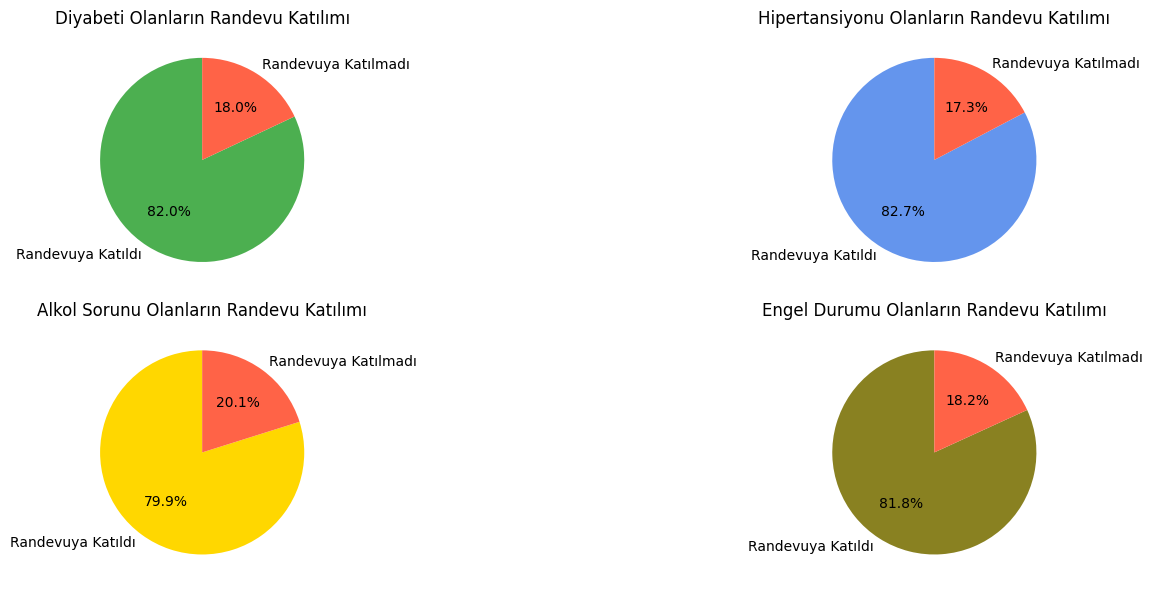

In [ ]:
plt.figure(figsize=(17,6))
plt.subplot(2, 2, 1)


plt.pie(
    [diabetes.loc[True, True], diabetes.loc[False, True]],
    labels=['Randevuya Katıldı', 'Randevuya Katılmadı'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#4CAF50', '#FF6347']
)
plt.title("Diyabeti Olanların Randevu Katılımı")

plt.subplot(2, 2, 2)
plt.pie(
    [hipertension.loc[True, True], hipertension.loc[False, True]],
    labels=['Randevuya Katıldı', 'Randevuya Katılmadı'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#6495ED', '#FF6347']
)
plt.title("Hipertansiyonu Olanların Randevu Katılımı")

plt.subplot(2, 2, 3)
plt.pie(
    [alchol.loc[True, True], alchol.loc[False, True]],
    labels=['Randevuya Katıldı', 'Randevuya Katılmadı'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#FFD700', '#FF6347']
)
plt.title("Alkol Sorunu Olanların Randevu Katılımı")

plt.subplot(2, 2, 4)
plt.pie(
    [handcap.loc[True, True], handcap.loc[False, True]],
    labels=['Randevuya Katıldı', 'Randevuya Katılmadı'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#898121', '#FF6347']
)
plt.title("Engel Durumu Olanların Randevu Katılımı")

plt.tight_layout()
plt.show()

<Figure size 1700x600 with 0 Axes>

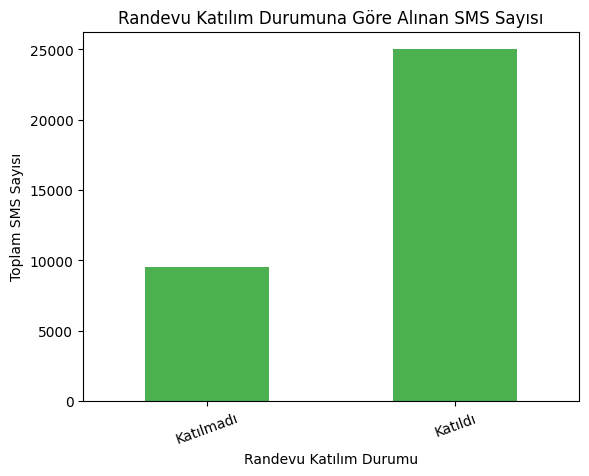

In [ ]:
sms_data = df.groupby("Showed_up").agg({"SMS_received": "sum"})

plt.figure(figsize=(17,6))
sms_data.plot(kind='bar', legend=False, color=['#4CAF50', '#FF6347'])
plt.title("Randevu Katılım Durumuna Göre Alınan SMS Sayısı")
plt.xlabel("Randevu Katılım Durumu")
plt.ylabel("Toplam SMS Sayısı")
plt.xticks(ticks=[0, 1], labels=["Katılmadı", "Katıldı"], rotation=20)

plt.show()

<Figure size 1200x800 with 0 Axes>

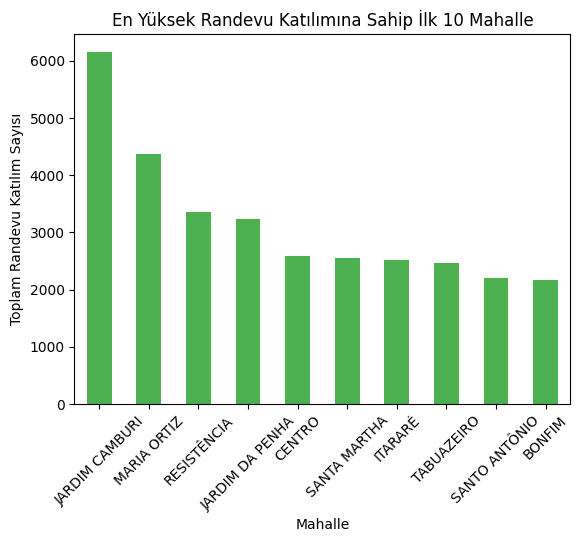

In [ ]:
neighbourhood_data = df.groupby("Neighbourhood").agg({"Showed_up": "sum"}).sort_values(by="Showed_up", ascending=False)

top_neighbourhoods = neighbourhood_data.head(10)

plt.figure(figsize=(12, 8))
top_neighbourhoods.plot(kind='bar', legend=False, color='#4CAF50')

plt.title("En Yüksek Randevu Katılımına Sahip İlk 10 Mahalle")
plt.xlabel("Mahalle")
plt.ylabel("Toplam Randevu Katılım Sayısı")
plt.xticks(rotation=45)

plt.show()

<Figure size 1200x800 with 0 Axes>

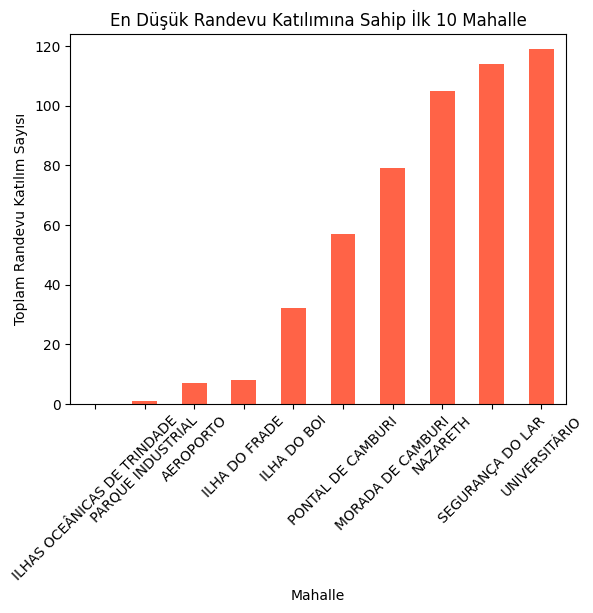

In [ ]:
neighbourhood_data = df.groupby("Neighbourhood").agg({"Showed_up": "sum"})

bottom_neighbourhoods = neighbourhood_data.nsmallest(10, "Showed_up")

plt.figure(figsize=(12, 8))
bottom_neighbourhoods.plot(kind='bar', legend=False, color='#FF6347')

plt.title("En Düşük Randevu Katılımına Sahip İlk 10 Mahalle")
plt.xlabel("Mahalle")
plt.ylabel("Toplam Randevu Katılım Sayısı")
plt.xticks(rotation=45)

plt.ylim(0, bottom_neighbourhoods['Showed_up'].max() + 5)

plt.show()

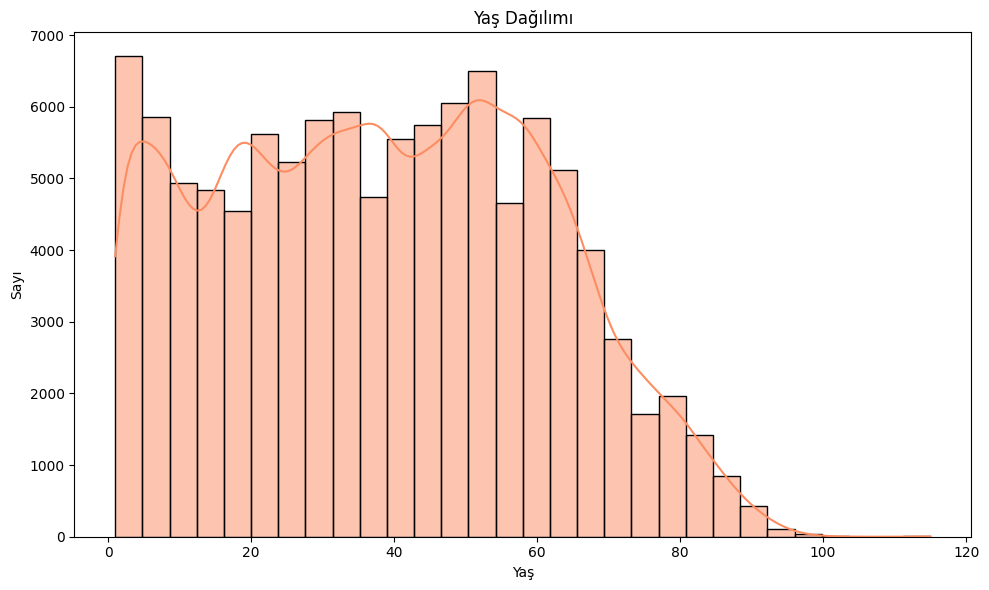

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color = "#FC8D62")
plt.title('Yaş Dağılımı')
plt.xlabel('Yaş')
plt.ylabel('Sayı')
plt.tight_layout()
plt.show()

<ipython-input-52-73270d02a0c6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age_Group', data=df, palette='Set2')


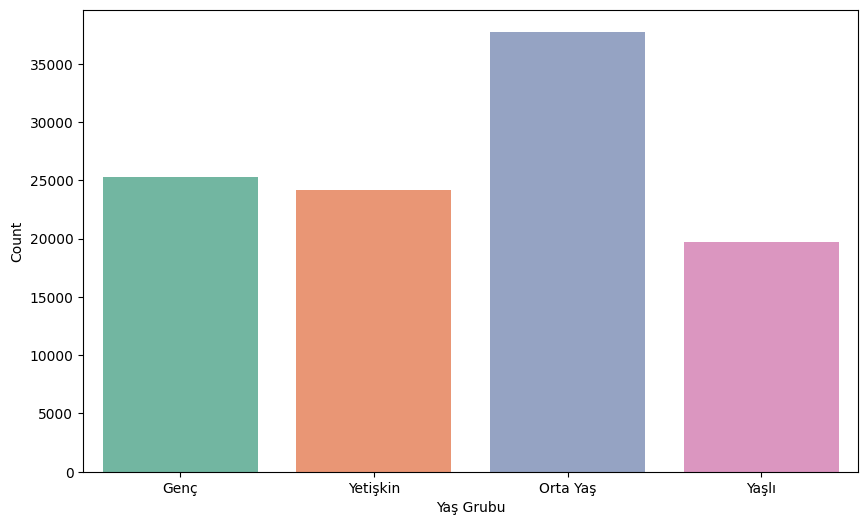

In [ ]:
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 35, 60, 100], labels=['Genç', 'Yetişkin', 'Orta Yaş', 'Yaşlı'])

plt.figure(figsize=(10,6))
sns.countplot(x='Age_Group', data=df, palette='Set2')
plt.xlabel('Yaş Grubu')
plt.ylabel('Count')
plt.show()

# ***HİPOTEZ TESTLERİ***

1. Randevuya gelip gelmeme ile yaş arasındaki ilişki;

*   Hipotez: Yaş değişkeni ile randevu durumu arasında bir ilişki durumu.
*   H0: Yaş değişkeni ile randevu durumu arasında anlamlı bir ilişki yoktur.

*   H1: Yaş değişkeni ile randevu durumu arasında anlamlı bir ilişki vardır.
*   Test: T-testi (Shapiro-Wilk) / Mann-Whitney U Testi




  
  
  
  

In [ ]:
age_showed_up = df[df['Showed_up'] == True]['Age']
age_no_show = df[df['Showed_up'] == False]['Age']

print("age_showed_up length:", len(age_showed_up))
print("age_no_show length:", len(age_no_show))

age_showed_up length: 85307
age_no_show length: 21680


In [ ]:
stat_showed, p_showed = shapiro(age_showed_up)
stat_no_show, p_no_show = shapiro(age_no_show)

print(f"Shapiro-Wilk Testi (Showed Up): Test Statistic = {stat_showed}, p-value = {p_showed}")
print(f"Shapiro-Wilk Testi (No Show): Test Statistic = {stat_no_show}, p-value = {p_no_show}")

Shapiro-Wilk Testi (Showed Up): Test Statistic = 0.9725398034041428, p-value = 7.783387577488239e-77
Shapiro-Wilk Testi (No Show): Test Statistic = 0.9711084273944766, p-value = 2.2262576092670994e-53


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 85307.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21680.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk testi sonuçlarına göre, hem randevuya gelenlerin hem de gelmeyenlerin yaş verileri normal dağılıma uygun değildir (p-value < 0.05).
Bu nedenle, normal dağılım varsayımına dayalı yöntemler yerine non-parametrik testler kullanılmalıdır.



In [ ]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U Test
stat_u, p_u = mannwhitneyu(age_showed_up, age_no_show)

# Display the results
print(f"Mann-Whitney U Test: Test Statistic = {stat_u}, p-value = {p_u}")


Mann-Whitney U Test: Test Statistic = 1015591109.0, p-value = 6.407426831780236e-111


Mann-Whitney U testi sonuçlarına göre, randevuya gelenler ve gelmeyenler arasındaki yaşlar arasında anlamlı bir fark bulunmaktadır (p-value < 0.05).
Test istatistiği (U = 1,015,591,109) oldukça yüksek bir değere sahip, bu da gruplar arasındaki farkın büyük olduğunu gösteriyor.
Bu sonuç, randevuya gelme durumu ile yaşlar arasında istatistiksel olarak anlamlı bir ilişki olduğunu ortaya koymaktadır.
H0 hipotezi reddedilmiştir.

2. Cinsiyet ile randevu durumu arasındaki ilişki;

*   Hipotez: Cinsiyet ile randevuya gelip gelmeme arasındaki ilişki.
*   H0: Hastanın cinsiyeti ile randevu durumu arasında anlamlı bir ilişki yoktur.

*   H1: Hastanın cinyiset durumu ile randevuya gelme yada gelmeme arasında anlamlı bir ilişki vardır.
*   Test: Ki-Kare Testi





In [ ]:
# Frekans tablosu oluşturma
contingency_table = pd.crosstab(df['Gender'], df['Showed_up'])

# Ki-Kare testi
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Ki-Kare Değeri: {chi2}")
print(f"P-değeri: {p}")
print(f"Serbestlik Derecesi: {dof}")
print(f"Beklenen Değerler Tablosu: \n{expected}")

if p < 0.05:
    print("H0 hipotezi reddedilir: Cinsiyet ile randevuya gelme durumu arasında anlamlı bir ilişki vardır.")
else:
    print("H0 hipotezi kabul edilir: Cinsiyet ile randevuya gelme durumu arasında anlamlı bir ilişki yoktur.")

Ki-Kare Değeri: 4.245533488546367
P-değeri: 0.03935370355967199
Serbestlik Derecesi: 1
Beklenen Değerler Tablosu: 
[[ 9305.34036869 34588.65963131]
 [ 4977.65963131 18502.34036869]]
H0 hipotezi reddedilir: Cinsiyet ile randevuya gelme durumu arasında anlamlı bir ilişki vardır.


3. Mahalle ile randevu durumu arasındaki ilişki;

*   Hipotez: Randevuya gelip gelmeme durumu ile mahalle bilgisi arasındaki ilişki.
*   H0: Hastanın randevu durumu ile mahalle bilgisi arasında anlamlı bir ilişki yoktur.

*   H1: Hastanın randevu durumu ile mahalle bilgisi arasında anlamlı bir ilişki vardır.
*   Test: Ki-Kare Testi





In [ ]:
# Frekans tablosu oluşturma
contingency_table = pd.crosstab(df['Neighbourhood'], df['Showed_up'])

# Ki-Kare testi
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Ki-Kare Değeri: {chi2}")
print(f"P-değeri: {p}")
print(f"Serbestlik Derecesi: {dof}")
print(f"Beklenen Değerler Tablosu: \n{expected}")

if p < 0.05:
    print("H0 hipotezi reddedilir: Mahalle bilgisi ile randevuya gelme durumu arasında anlamlı bir ilişki vardır.")
else:
    print("H0 hipotezi kabul edilir: Mahalle bilgisi ile randevuya gelme durumu arasında anlamlı bir ilişki yoktur.")

Ki-Kare Değeri: 366.8635220629782
P-değeri: 1.1728333832531831e-38
Serbestlik Derecesi: 79
Beklenen Değerler Tablosu: 
[[1.05997863e+00 3.94002137e+00]
 [2.38919182e+02 8.88080818e+02]
 [3.90072135e+01 1.44992787e+02]
 [3.47672990e+01 1.29232701e+02]
 [3.39193161e+01 1.26080684e+02]
 [2.51214935e+02 9.33785065e+02]
 [1.22957521e+02 4.57042479e+02]
 [3.90072135e+01 1.44992787e+02]
 [2.14115683e+02 7.95884317e+02]
 [3.41949105e+02 1.27105090e+03]
 [4.24627438e+02 1.57837256e+03]
 [3.62512690e+01 1.34748731e+02]
 [8.62822602e+01 3.20717740e+02]
 [1.82528320e+02 6.78471680e+02]
 [2.06271841e+02 7.66728159e+02]
 [2.80894336e+02 1.04410566e+03]
 [4.43071066e+01 1.64692893e+02]
 [8.75542346e+01 3.25445765e+02]
 [5.53308843e+01 2.05669116e+02]
 [1.35465269e+02 5.03534731e+02]
 [3.13753674e+01 1.16624633e+02]
 [6.59306706e+01 2.45069329e+02]
 [6.21147475e+01 2.30885252e+02]
 [2.90222148e+02 1.07877785e+03]
 [3.87952177e+01 1.44204782e+02]
 [8.90382046e+01 3.30961795e+02]
 [1.31861341e+02 4.9013

4. Hipertansiyon ile randevu durumu arasındaki ilişki;

*   Hipotez: Hastanın hipertansiyon olması ile randevu durumu ilişkisi.
*   H0: Hastanın randevuya gelip gelmeme durumu ile hipertansiyon hastası olma arasında anlamlı bir ilişki yoktur.

*   H1: Hastanın randevuya gelip gelmeme durumu ile hipertansiyon hastası olma arasında anlamlı bir ilişki vardır.
*   Test: Ki-Kare Testi





In [ ]:
# Frekans tablosu oluşturma
contingency_table = pd.crosstab(df['Hipertension'], df['Showed_up'])

# Ki-Kare testi
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Ki-Kare Değeri: {chi2}")
print(f"P-değeri: {p}")
print(f"Serbestlik Derecesi: {dof}")
print(f"Beklenen Değerler Tablosu: \n{expected}")

if p < 0.05:
    print("H0 hipotezi reddedilir: Hipertansiyon ile randevuya gelme durumu arasında anlamlı bir ilişki vardır.")
else:
    print("H0 hipotezi kabul edilir: Hipertansiyon ile randevuya gelme durumu arasında anlamlı bir ilişki yoktur.")

Ki-Kare Değeri: 90.1741374154669
P-değeri: 2.1809438706719136e-21
Serbestlik Derecesi: 1
Beklenen Değerler Tablosu: 
[[11479.35653219 42669.64346781]
 [ 2803.64346781 10421.35653219]]
H0 hipotezi reddedilir: Hipertansiyon ile randevuya gelme durumu arasında anlamlı bir ilişki vardır.


5. Diyabet ile randevu durumu arasındaki ilişki;

*   Hipotez: Hastanın diyabet olması ile randevu durumu ilişkisi.
*   H0: Hastanın randevuya gelip gelmeme durumu ile diyabet hastası olma arasında anlamlı bir ilişki yoktur.

*   H1: Hastanın randevuya gelip gelmeme durumu ile diyabet hastası olma arasında anlamlı bir ilişki vardır.
*   Test: Ki-Kare Testi






In [ ]:
# Frekans tablosu oluşturma
contingency_table = pd.crosstab(df['Diabetes'], df['Showed_up'])

# Ki-Kare testi
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Ki-Kare Değeri: {chi2}")
print(f"P-değeri: {p}")
print(f"Serbestlik Derecesi: {dof}")
print(f"Beklenen Değerler Tablosu: \n{expected}")

if p < 0.05:
    print("H0 hipotezi reddedilir: Diyabet ile randevuya gelme durumu arasında anlamlı bir ilişki vardır.")
else:
    print("H0 hipotezi kabul edilir: Diyabet ile randevuya gelme durumu arasında anlamlı bir ilişki yoktur.")

Ki-Kare Değeri: 17.25683343284983
P-değeri: 3.2652108300837514e-05
Serbestlik Derecesi: 1
Beklenen Değerler Tablosu: 
[[13289.37603527 49397.62396473]
 [  993.62396473  3693.37603527]]
H0 hipotezi reddedilir: Diyabet ile randevuya gelme durumu arasında anlamlı bir ilişki vardır.


6. Alkol Bağımlılığı ile randevu durumu arasındaki ilişki;

*   Hipotez: Hastanın alkol bağımlısı olması ile randevu durumu ilişkisi.
*   H0: Hastanın randevuya gelip gelmeme durumu ile alkol bağımlısı olma arasında anlamlı bir ilişki yoktur.

*   H1: Hastanın randevuya gelip gelmeme durumu ile alkol bağımlısı olma arasında anlamlı bir ilişki vardır.
*   Test: Ki-Kare Testi / Logistik Regresyon





In [ ]:
# Frekans tablosu oluşturma
contingency_table = pd.crosstab(df['Alcoholism'], df['Showed_up'])

# Ki-Kare testi
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Ki-Kare Değeri: {chi2}")
print(f"P-değeri: {p}")
print(f"Serbestlik Derecesi: {dof}")
print(f"Beklenen Değerler Tablosu: \n{expected}")

if p < 0.05:
    print("H0 hipotezi reddedilir: Alkol bağımlılığı ile randevuya gelme durumu arasında anlamlı bir ilişki vardır.")
else:
    print("H0 hipotezi kabul edilir: Alkol bağımlılığı ile randevuya gelme durumu arasında anlamlı bir ilişki yoktur.")

Ki-Kare Değeri: 1.14945626697936
P-değeri: 0.2836630008966724
Serbestlik Derecesi: 1
Beklenen Değerler Tablosu: 
[[13835.6890195 51428.3109805]
 [  447.3109805  1662.6890195]]
H0 hipotezi kabul edilir: Alkol bağımlılığı ile randevuya gelme durumu arasında anlamlı bir ilişki yoktur.


In [ ]:
df = df.dropna(subset=['Alcoholism'])
df['Alcoholism'] = df['Alcoholism'].astype(int)
df['Showed_up'] = df['Showed_up'].astype(int)

X = df[['Alcoholism']]
X = sm.add_constant(X)
y = df['Showed_up']

model = sm.Logit(y, X)
result = model.fit()

print(result.summary())

p_value = result.pvalues['Alcoholism']
if p_value < 0.05:
    print("H0 hipotezi reddedilir: Alkol bağımlılığı ile randevuya gelme durumu arasında anlamlı bir ilişki vardır.")
else:
    print("H0 hipotezi kabul edilir: Alkol bağımlılığı ile randevuya gelme durumu arasında anlamlı bir ilişki yoktur.")


Optimization terminated successfully.
         Current function value: 0.516580
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              Showed_up   No. Observations:                67374
Model:                          Logit   Df Residuals:                    67372
Method:                           MLE   Df Model:                            1
Date:                Mon, 25 Nov 2024   Pseudo R-squ.:               1.755e-05
Time:                        09:37:51   Log-Likelihood:                -34804.
converged:                       True   LL-Null:                       -34805.
Covariance Type:            nonrobust   LLR p-value:                    0.2691
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3111      0.010    136.970      0.000       1.292       1.330
Alcoholism     0.0605      0.

7. Engel durumu ile randevu gelip gelmeme ilişkisi;

*   Hipotez: Hastanın engel durumunun bulunması ile randevuya gelip gelmeme arasındaki ilişki.
*   H0: Hastanın engel durumu ile randevuya gelip gelmeme arasında anlamlı bir ilişki yoktur.

*   H1: Hastanın engel durumu ile randevuya gelip gelmeme arasında anlamlı bir ilişki vardır.
*   Test: Ki-Kare Testi





In [ ]:
# Frekans tablosu oluşturma
contingency_table = pd.crosstab(df['Handcap'], df['Showed_up'])

# Ki-Kare testi
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Ki-Kare Değeri: {chi2}")
print(f"P-değeri: {p}")
print(f"Serbestlik Derecesi: {dof}")
print(f"Beklenen Değerler Tablosu: \n{expected}")

if p < 0.05:
    print("H0 hipotezi reddedilir: Hastanın engel durumu ile randevuya gelme durumu arasında anlamlı bir ilişki vardır.")
else:
    print("H0 hipotezi kabul edilir: Hastanın engel durumu ile randevuya gelme durumu arasında anlamlı bir ilişki yoktur.")

Ki-Kare Değeri: 6.080096103877427
P-değeri: 0.013671333314443451
Serbestlik Derecesi: 1
Beklenen Değerler Tablosu: 
[[21226.08316898 83520.91683102]
 [  453.91683102  1786.08316898]]
H0 hipotezi reddedilir: Hastanın engel durumu ile randevuya gelme durumu arasında anlamlı bir ilişki vardır.


8. Hastanın sağlık yardımı alması ile randevu durumu arasındaki ilişki;

*   Hipotez: Hastanın randevu durumu ile sağlık yardımı ilişkisi.
*   H0: Hastanın sağlık yardımı alması ile randevuya gelip gelmemesi arasında anlamlı bir ilişki yoktur.

*   H1: Hastının sağlık yardımı alması ile randevuya gelip gelmemesi arasında anlamlı bir ilişki vardır.
*   Test: Ki-Kare Testi





In [ ]:
# Frekans tablosu oluşturma
contingency_table = pd.crosstab(df['Scholarship'], df['Showed_up'])

# Ki-Kare testi
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Ki-Kare Değeri: {chi2}")
print(f"P-değeri: {p}")
print(f"Serbestlik Derecesi: {dof}")
print(f"Beklenen Değerler Tablosu: \n{expected}")

if p < 0.05:
    print("H0 hipotezi reddedilir: Hastanın sağlık bursu alması durumu ile randevuya gelme durumu arasında anlamlı bir ilişki vardır.")
else:
    print("H0 hipotezi kabul edilir: Hastanın sağlık bursu alması durumu ile randevuya gelme durumu arasında anlamlı bir ilişki yoktur.")

Ki-Kare Değeri: 92.04383938843907
P-değeri: 8.47774514795202e-22
Serbestlik Derecesi: 1
Beklenen Değerler Tablosu: 
[[19489.6486489 76688.3513511]
 [ 2190.3513511  8618.6486489]]
H0 hipotezi reddedilir: Hastanın sağlık bursu alması durumu ile randevuya gelme durumu arasında anlamlı bir ilişki vardır.


9. SMS hatırlatması ile randevu durumu arasındaki ilişki;

*   Hipotez: Hastaya randevu öncesinde gelen SMS hatırlatması ile randevuya gelip gelmeme arasındaki ilişki.
*   H1: Hastaya gelen SMS hatırlatması ile randevu durumu arasında anlamlı bir ilişki yoktur.

*   H1: Hastaya gelen SMS hatırlatması ile randevu durumu arasında anlamlı bir ilişki vardır.
*   Test: Ki-Kare Testi





In [ ]:
# Frekans tablosu oluşturma
contingency_table = pd.crosstab(df['SMS_received'], df['Showed_up'])

# Ki-Kare testi
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Ki-Kare Değeri: {chi2}")
print(f"P-değeri: {p}")
print(f"Serbestlik Derecesi: {dof}")
print(f"Beklenen Değerler Tablosu: \n{expected}")

if p < 0.05:
    print("H0 hipotezi reddedilir: Hastanın SMS alması durumu ile randevuya gelme durumu arasında anlamlı bir ilişki vardır.")
else:
    print("H0 hipotezi kabul edilir: Hastanın SMS alması durumu ile randevuya gelme durumu arasında anlamlı bir ilişki yoktur.")

Ki-Kare Değeri: 1731.8120940388308
P-değeri: 0.0
Serbestlik Derecesi: 1
Beklenen Değerler Tablosu: 
[[14671.64571397 57730.35428603]
 [ 7008.35428603 27576.64571397]]
H0 hipotezi reddedilir: Hastanın SMS alması durumu ile randevuya gelme durumu arasında anlamlı bir ilişki vardır.


10. Hastanın randevu aldığı gün ile randevu günü arasındaki farkın randevu durumu ile ilişkisi;

*   Hipotez: Hastanın hastane randevusu aldığı gün ile hastaneye gideceği gün arasındaki fark ile randevuya gelip gelmeme durumu üzerindeki ilişki.
*   H0: Hastanın randevu aldığı gün ile randevu günü arasındaki farkın randevu durumu üzerinde bir etkisi yoktur.

*   H1: Hastanın randevu aldığı gün ile randevu günü arasındaki farkın randevu durumu ile anlamlı bir ilişkisi vardır.
*   Test: T-Testi





In [ ]:
df['Date.diff'] = pd.to_numeric(df['Date.diff'], errors='coerce')

group_1 = df[df['Showed_up'] == 1]['Date.diff']
group_2 = df[df['Showed_up'] == 0]['Date.diff']

stat, p_value = ttest_ind(group_1, group_2)

print("T-Testi Sonucu:")
print(f"Test istatistiği: {stat}")
print(f"P-değeri: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("H0 reddedildi: Hastanın randevu aldığı gün ile randevu günü arasındaki fark, randevuya gidip gitmeme durumuyla anlamlı bir ilişkiye sahiptir.")
else:
    print("H0 kabul edildi: Hastanın randevu aldığı gün ile randevu günü arasındaki fark, randevuya gidip gitmeme durumu üzerinde anlamlı bir etkiye sahip değildir.")

T-Testi Sonucu:
Test istatistiği: -61.81623899171226
P-değeri: 0.0
H0 reddedildi: Hastanın randevu aldığı gün ile randevu günü arasındaki fark, randevuya gidip gitmeme durumuyla anlamlı bir ilişkiye sahiptir.


# ***MODEL KURMAK İÇİN VERİ HAZIRLAMA***

In [18]:
df.drop(["PatientId", "AppointmentID"], axis=1, inplace=True)

In [19]:
df["Gender"] = df["Gender"].map({"F": 0, "M": 1})

In [20]:
df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"])
df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"])

In [21]:
df["DaysUntilAppointment"] = (df["AppointmentDay"] - df["ScheduledDay"]).dt.days

In [22]:
df["Neighbourhood"] = df["Neighbourhood"].astype("category").cat.codes

In [23]:
boolean_columns = ["Scholarship", "Hipertension", "Diabetes", "Alcoholism", "Handcap", "SMS_received", "Showed_up"]
df[boolean_columns] = df[boolean_columns].astype(int)

In [24]:
df.drop(["ScheduledDay", "AppointmentDay"], axis=1, inplace=True)

In [25]:
y = df[["Showed_up"]]
x = df.drop(['Showed_up'], axis = 1)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.70, random_state=42)

In [27]:
standart = StandardScaler()

In [28]:
x_train_scaler = standart.fit_transform(x_train)
x_test_scaler = standart.transform(x_test)

In [29]:
df.head(1)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff,DaysUntilAppointment
0,0,62,39,0,1,0,0,0,0,1,0,0


# ***MODEL KURULMASI***

In [33]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200, 300]
}
                                                                                    #Logistic Regression
start_train_time = time.time()
lr = LogisticRegression()
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(x_train_scaler, y_train)
end_train_time = time.time()

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
total_train_time1 = end_train_time - start_train_time


y_train_pred = best_model.predict(x_train_scaler)

train_accuracy1 = accuracy_score(y_train, y_train_pred)
train_f1_1 = f1_score(y_train, y_train_pred)
train_recall1 = recall_score(y_train, y_train_pred)
train_precision1 = precision_score(y_train, y_train_pred)
train_confusion1 = confusion_matrix(y_train, y_train_pred)
train_roc_auc1 = roc_auc_score(y_train, y_train_pred)
train_log_loss1 = log_loss(y_train, y_train_pred)





start_test_time = time.time()
y_test_pred = best_model.predict(x_test_scaler)
end_test_time = time.time()
total_test_time1 = end_test_time - start_test_time

test_accuracy1 = accuracy_score(y_test, y_test_pred)
test_f1_1 = f1_score(y_test, y_test_pred)
test_recall1 = recall_score(y_test, y_test_pred)
test_precision1 = precision_score(y_test, y_test_pred)
test_confusion1 = confusion_matrix(y_test, y_test_pred)
test_roc_auc1 = roc_auc_score(y_test, y_test_pred)
test_log_loss1 = log_loss(y_test, y_test_pred)




print(f"Best Parameters: {best_params}")
print(f"Train Time : {total_train_time1}")
print(f"Train Accuracy : {train_accuracy1}")
print(f"Train F1 : {train_f1_1}")
print(f"Train Recall : {train_recall1}")
print(f"Train Precision : {train_precision1}")
print(f"Train Confusion Matrix : {train_confusion1}")
print(f"Train Roc Auc : {train_roc_auc1}")
print(f"Train Log Loss : {train_log_loss1}")
print("------------------------------------------------------")
print(f"Test Time : {total_test_time1}")
print(f"Test Accuracy: {test_accuracy1}")
print(f"Test F1 : {test_f1_1}")
print(f"Test Recall : {test_recall1}")
print(f"Test Precision : {test_precision1}")
print(f"Test Confusion Matrix : {test_confusion1}")
print(f"Test Roc Auc : {test_roc_auc1}")
print(f"Test Log Loss : {test_log_loss1}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'C': 0.01, 'max_iter': 100, 'solver': 'lbfgs'}
Train Time : 15.116599082946777
Train Accuracy : 0.7940980104152757
Train F1 : 0.8847895279508674
Train Recall : 0.9912445173602973
Train Precision : 0.798982565984779
Train Confusion Matrix : [[  259 14897]
 [  523 59211]]
Train Roc Auc : 0.504166729516781
Train Log Loss : 7.421459944721412
------------------------------------------------------
Test Time : 0.005601644515991211
Test Accuracy: 0.7938436614013771
Test F1 : 0.884662983040212
Test Recall : 0.9923356665232863
Test Precision : 0.7980690609472294
Test Confusion Matrix : [[  103  6421]
 [  196 25377]]
Test Roc Auc : 0.5040617633658736
Test Log Loss : 7.430627612418238


In [34]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced'],
    'ccp_alpha': [0.0, 0.01, 0.1]
}                                                                                   #Decision Tree Classifier

start_train_time = time.time()
dc = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator= dc, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(x_train_scaler, y_train)
end_train_time = time.time()

best_model2 = grid_search.best_estimator_
best_params2 = grid_search.best_params_
total_train_time2 = end_train_time - start_train_time

y_tarin_pred = best_model2.predict(x_train_scaler)

train_accuracy2 = accuracy_score(y_train, y_train_pred)
train_f1_2 = f1_score(y_train, y_train_pred)
train_recall2 = recall_score(y_train, y_train_pred)
train_precision2 = precision_score(y_train, y_train_pred)
train_confusion2 = confusion_matrix(y_train, y_train_pred)
train_roc_auc2 = roc_auc_score(y_train, y_train_pred)
train_log_loss2 = log_loss(y_train, y_train_pred)



start_test_time = time.time()
y_test_pred = best_model2.predict(x_test_scaler)
end_test_time = time.time()
total_test_time2 = end_test_time - start_test_time

test_accuracy2 = accuracy_score(y_test, y_test_pred)
test_f1_2 = f1_score(y_test, y_test_pred)
test_recall2 = recall_score(y_test, y_test_pred)
test_precision2 = precision_score(y_test, y_test_pred)
test_confusion2 = confusion_matrix(y_test, y_test_pred)
test_roc_auc2 = roc_auc_score(y_test, y_test_pred)
test_log_loss2 = log_loss(y_test, y_test_pred)




print(f"Best Parameters: {best_params2}")
print(f"Train Time : {total_train_time2}")
print(f"Train Accuracy : {train_accuracy2}")
print(f"Train F1 : {train_f1_2}")
print(f"Train Recall : {train_recall2}")
print(f"Train Precision : {train_precision2}")
print(f"Train Confusion Matrix : {train_confusion2}")
print(f"Train Roc Auc : {train_roc_auc2}")
print(f"Train Log Loss : {train_log_loss2}")
print("------------------------------------------------------")
print(f"Test Time : {total_test_time2}")
print(f"Test Accuracy: {test_accuracy2}")
print(f"Test F1 : {test_f1_2}")
print(f"Test Recall : {test_recall2}")
print(f"Test Precision : {test_precision2}")
print(f"Test Confusion Matrix : {test_confusion2}")
print(f"Test Roc Auc : {test_roc_auc2}")
print(f"Test Log Loss : {test_log_loss2}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Train Time : 211.56002044677734
Train Accuracy : 0.7940980104152757
Train F1 : 0.8847895279508674
Train Recall : 0.9912445173602973
Train Precision : 0.798982565984779
Train Confusion Matrix : [[  259 14897]
 [  523 59211]]
Train Roc Auc : 0.504166729516781
Train Log Loss : 7.421459944721412
------------------------------------------------------
Test Time : 0.00617671012878418
Test Accuracy: 0.6115213259806213
Test F1 : 0.7062039065997502
Test Recall : 0.5860086810307746
Test Precision : 0.8884277922693858
Test Confusion Matrix : [[ 4642  1882]
 [10587 14986]]
Test Roc Auc : 0.6487676758924565
Test Log Loss : 14.00219067541832


In [35]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True],
    'criterion': ['gini'],
}                                                                                   #Random Forest Classifier

start_train_time = time.time()
rd = RandomForestClassifier()
grid_search = GridSearchCV(estimator= rd, param_grid= param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(x_train_scaler, y_train)
end_train_time = time.time()

best_model3 = grid_search.best_estimator_
best_params3 = grid_search.best_params_
total_train_time3 = end_train_time - start_train_time

y_train_pred = best_model3.predict(x_train_scaler)

train_accuracy3 = accuracy_score(y_train, y_train_pred)
train_f1_3 = f1_score(y_train, y_train_pred)
train_recall3 = recall_score(y_train, y_train_pred)
train_precision3 = precision_score(y_train, y_train_pred)
train_confusion3 = confusion_matrix(y_train, y_train_pred)
train_roc_auc3 = roc_auc_score(y_train, y_train_pred)
train_log_loss3 = log_loss(y_train, y_train_pred)


start_test_time = time.time()
y_test_pred = best_model3.predict(x_test_scaler)
end_test_time = time.time()
total_test_time3 = end_test_time - start_test_time

test_accuracy3 = accuracy_score(y_test, y_test_pred)
test_f1_3 = f1_score(y_test, y_test_pred)
test_recall3 = recall_score(y_test, y_test_pred)
test_precision3 = precision_score(y_test, y_test_pred)
test_confusion3 = confusion_matrix(y_test, y_test_pred)
test_roc_auc3 = roc_auc_score(y_test, y_test_pred)
test_log_loss3 = log_loss(y_test, y_test_pred)




print(f"Best Parameters: {best_params3}")
print(f"Train Time : {total_train_time3}")
print(f"Train Accuracy : {train_accuracy3}")
print(f"Train F1 : {train_f1_3}")
print(f"Train Recall : {train_recall3}")
print(f"Train Precision : {train_precision3}")
print(f"Train Confusion Matrix : {train_confusion3}")
print(f"Train Roc Auc : {train_roc_auc3}")
print(f"Train Log Loss : {train_log_loss3}")
print("------------------------------------------------------")
print(f"Test Time : {total_test_time3}")
print(f"Test Accuracy: {test_accuracy3}")
print(f"Test F1 : {test_f1_3}")
print(f"Test Recall : {test_recall3}")
print(f"Test Precision : {test_precision3}")
print(f"Test Confusion Matrix : {test_confusion3}")
print(f"Test Roc Auc : {test_roc_auc3}")
print(f"Test Log Loss : {test_log_loss3}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Train Time : 280.0994350910187
Train Accuracy : 0.7998798237414875
Train F1 : 0.8885152978107728
Train Recall : 0.9997991093849399
Train Precision : 0.7995234079012544
Train Confusion Matrix : [[  181 14975]
 [   12 59722]]
Train Roc Auc : 0.5058707872076454
Train Log Loss : 7.213062269230854
------------------------------------------------------
Test Time : 0.1914370059967041
Test Accuracy: 0.7970838396111786
Test F1 : 0.8869368978387293
Test Recall : 0.9989441989598404
Test Precision : 0.797514985014985
Test Confusion Matrix : [[   38  6486]
 [   27 25546]]
Test Roc Auc : 0.5023844232076946
Test Log Loss : 7.3138397521051814


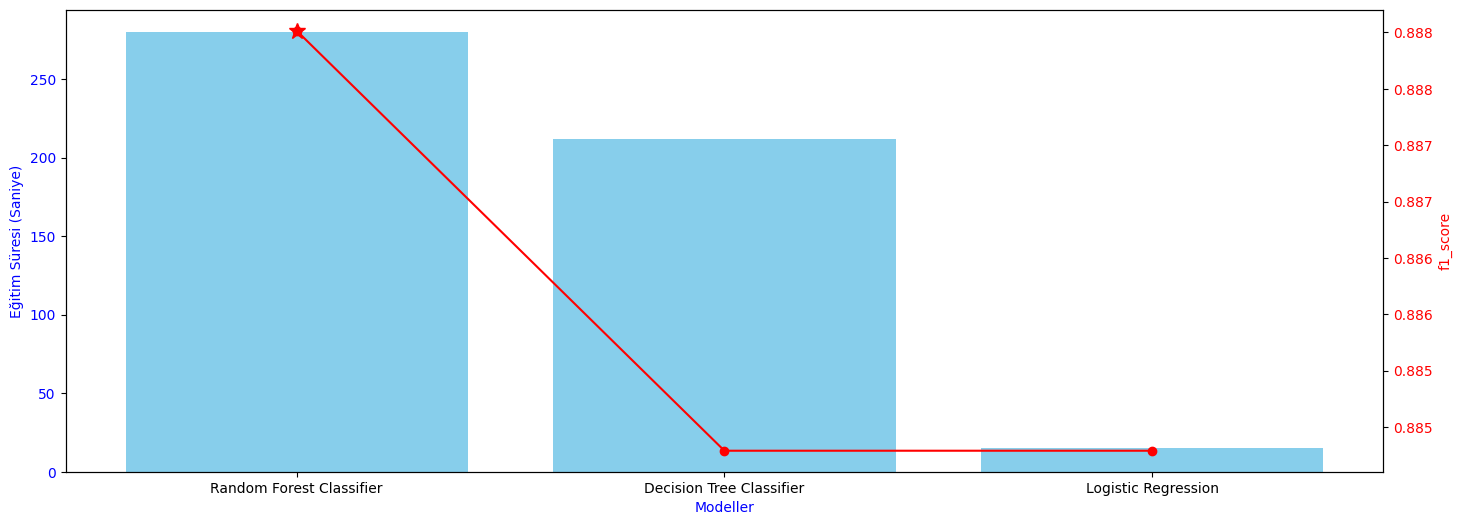

In [44]:
import matplotlib.ticker as mtick
models = ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier']
training_times = [total_train_time1, total_train_time2, total_train_time3]
f1_score = [train_f1_1, train_f1_2, train_f1_3]

sorted_indices = np.argsort(f1_score)[::-1]
models = [models[i] for i in sorted_indices]
training_times = [training_times[i] for i in sorted_indices]
f1_score = [f1_score[i] for i in sorted_indices]

fig, ax1 = plt.subplots(figsize=(17, 6))

ax1.bar(models, training_times, color='skyblue')
ax1.set_xlabel('Modeller', color = 'blue')
ax1.set_ylabel('Eğitim Süresi (Saniye)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()

ax2.plot(models, f1_score, color='red', marker='o', label='Diğer Modeller', markerfacecolor='red')

linear_index = models.index('Random Forest Classifier')
ax2.plot(models[linear_index], f1_score[linear_index], color='red', marker='*', markersize=12, label='Linear Model')

ax2.set_ylabel('f1_score', color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax2.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:.3f}'))

plt.show()

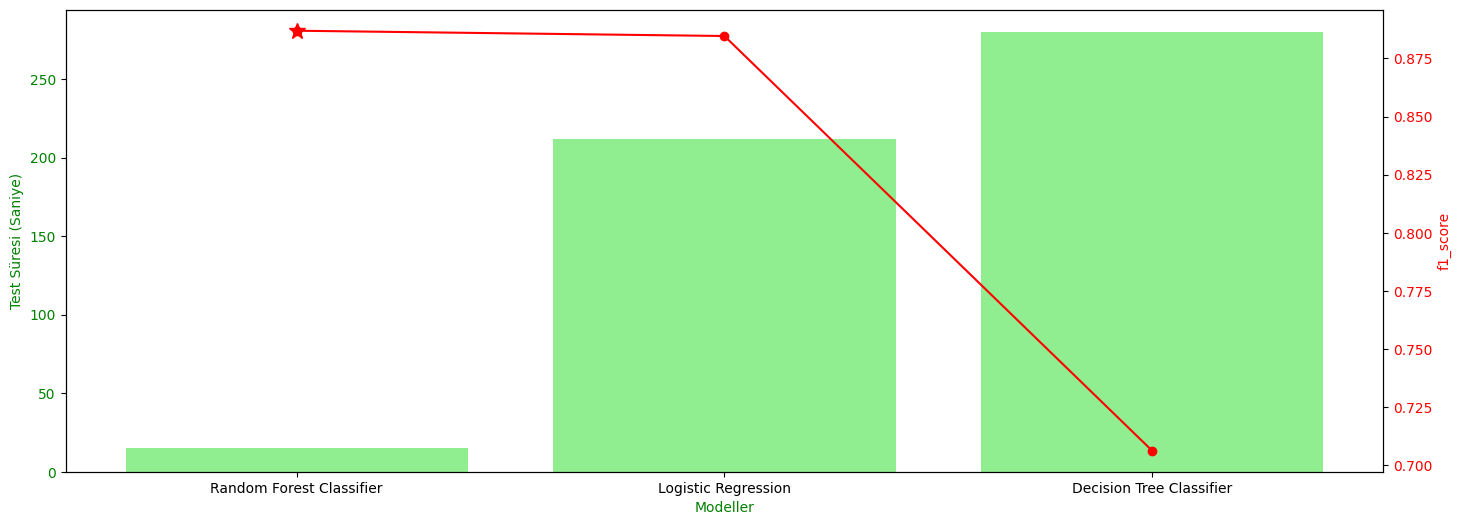

In [46]:
models = ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier']
testing_times = [total_train_time1, total_train_time2, total_train_time3]
f1_score = [test_f1_1, test_f1_2, test_f1_3]

sorted_indices = np.argsort(f1_score)[::-1]
models = [models[i] for i in sorted_indices]
training_times = [training_times[i] for i in sorted_indices]
f1_score = [f1_score[i] for i in sorted_indices]

fig, ax1 = plt.subplots(figsize=(17, 6))

ax1.bar(models, testing_times, color='lightgreen')
ax1.set_xlabel('Modeller', color= 'green')
ax1.set_ylabel('Test Süresi (Saniye)', color='green')
ax1.tick_params(axis='y', labelcolor='green')

ax2 = ax1.twinx()

ax2.plot(models, f1_score, color='red', marker='o', label='Diğer Modeller', markerfacecolor='red')

linear_index = models.index('Random Forest Classifier')
ax2.plot(models[linear_index], f1_score[linear_index], color='red', marker='*', markersize=12, label='Linear Model')

ax2.set_ylabel('f1_score', color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax2.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:.3f}'))

plt.show()